In [1]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

import os
import pandas as pd

# Prepairing the InceptionV3

In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [3]:
last_layer = base_model.get_layer("mixed7")
last_output = last_layer.output

In [4]:
for layer in base_model.layers:
    layer.trainable = False

# Adding Classification Layers to Models

In [5]:
x = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [6]:
model = Model(base_model.input, x)

In [7]:
x = base_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [8]:
model_dropout = Model(base_model.input, x)

# Compiling Models with RMSprop

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])

In [10]:
model_dropout.compile(optimizer = RMSprop(lr=0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])

# Prepairing The Dataset

In [11]:
TRAIN_DIR = "C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/train/"
TEST_DIR = "C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/"
TRAIN_DOGS_DIR ="C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/train/dogs"
TRAIN_CATS_DIR ="C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/train/cats"
TEST_DOGS_DIR ="C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/dogs"
TEST_CATS_DIR ="C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/cats"

In [ ]:
os.mkdir('C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/')
os.mkdir('C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/dogs')
os.mkdir('C:/Users/enes_/Documents/GitHub/TensorFlow Exercises/cats-vs-dogs/test/cats')

In [ ]:
import shutil

files = os.listdir(TRAIN_DIR)

categories = []
for filename in files:
    category = filename.split('.')[0]
    if category == 'dog':
        shutil.move(os.path.join(TRAIN_DIR,filename), TRAIN_DOGS_DIR)
    else:
        shutil.move(os.path.join(TRAIN_DIR,filename), TRAIN_CATS_DIR)

In [ ]:
files = os.listdir(TRAIN_DOGS_DIR)

for i in range(int(len(files)*0.2)):
    shutil.move(os.path.join(TRAIN_DOGS_DIR,files[i]), TEST_DOGS_DIR)
    

In [ ]:
files = os.listdir(TRAIN_CATS_DIR)

for i in range(int(len(files)*0.2)):
    shutil.move(os.path.join(TRAIN_CATS_DIR,files[i]), TEST_CATS_DIR)
    

# Image Augmentation

In [12]:
train_datagen = image.ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = image.ImageDataGenerator(rescale = 1.0/255)


train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     


validation_generator =  test_datagen.flow_from_directory( TEST_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 11185 images belonging to 2 classes.
Found 2796 images belonging to 2 classes.


# Callback

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

# Model Fitting

## Without Dropout

In [14]:
model_hist = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 559,
            epochs = 200,
            validation_steps = 139,
            verbose = 2,
            callbacks=[callback]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 559 steps, validate for 139 steps
Epoch 1/200
559/559 - 58s - loss: 0.3038 - accuracy: 0.8952 - val_loss: 0.1452 - val_accuracy: 0.9504
Epoch 2/200
559/559 - 53s - loss: 0.2629 - accuracy: 0.9074 - val_loss: 0.3367 - val_accuracy: 0.9604
Epoch 3/200
559/559 - 51s - loss: 0.2587 - accuracy: 0.9030 - val_loss: 0.1651 - val_accuracy: 0.9745
Epoch 4/200
559/559 - 51s - loss: 0.2399 - accuracy: 0.9119 - val_loss: 0.2800 - val_accuracy: 0.9662
Epoch 5/200
559/559 - 51s - loss: 0.2446 - accuracy: 0.9078 - val_loss: 0.3403 - val_accuracy: 0.9594
Epoch 6/200
559/559 - 51s - loss: 0.2377 - accuracy: 0.9133 - val_loss: 0.5144 - val_accuracy: 0.9493
Epoch 7/200
559/559 - 51s - loss: 0.2399 - accuracy: 0.9087 - val_loss: 0.2683 - val_accuracy: 0.9658
Epoch 8/200
559/559 - 51s - loss: 0.2343 - accuracy: 0.9124 - val_loss: 0.4455 - val_accuracy: 0.9547
Epoch 9/200
559/559 - 51s - loss: 0.2294 - accuracy: 0.9155 - val_loss: 0.2323 - val_accur


Bad key "text.kerning_factor" on line 4 in
C:\Users\enes_\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


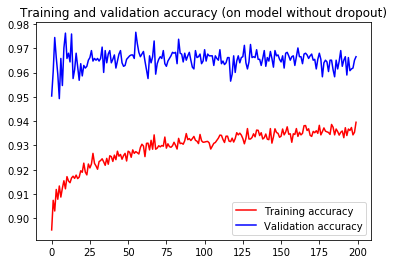

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (on model without dropout)')
plt.legend(loc=0)
plt.figure()


plt.show()

## With Dropout

In [ ]:
model_dropout_hist = model_dropout.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 559,
            epochs = 200,
            validation_steps = 139,
            verbose = 2,
            callbacks=[callback]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 559 steps, validate for 139 steps
Epoch 1/200
559/559 - 56s - loss: 0.3195 - accuracy: 0.8897 - val_loss: 0.1244 - val_accuracy: 0.9763
Epoch 2/200
559/559 - 52s - loss: 0.2706 - accuracy: 0.9010 - val_loss: 0.1671 - val_accuracy: 0.9741
Epoch 3/200
559/559 - 52s - loss: 0.2585 - accuracy: 0.9037 - val_loss: 0.2373 - val_accuracy: 0.9629
Epoch 4/200
559/559 - 51s - loss: 0.2439 - accuracy: 0.9103 - val_loss: 0.2906 - val_accuracy: 0.9637
Epoch 5/200
559/559 - 51s - loss: 0.2473 - accuracy: 0.9100 - val_loss: 0.3619 - val_accuracy: 0.9590
Epoch 6/200
559/559 - 51s - loss: 0.2372 - accuracy: 0.9104 - val_loss: 0.2132 - val_accuracy: 0.9698
Epoch 7/200
559/559 - 53s - loss: 0.2444 - accuracy: 0.9101 - val_loss: 0.3125 - val_accuracy: 0.9622
Epoch 8/200
559/559 - 52s - loss: 0.2307 - accuracy: 0.9148 - val_loss: 0.2581 - val_accuracy: 0.9683
Epoch 9/200
559/559 - 52s - loss: 0.2331 - accuracy: 0.9144 - val_loss: 0.2260 - val_accur

In [ ]:
acc = model_dropout_hist.history['accuracy']
val_acc = model_dropout_hist.history['val_accuracy']
loss = model_dropout_hist.history['loss']
val_loss = model_dropout_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy (on model with dropout)')
plt.legend(loc=0)
plt.figure()


plt.show()